In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_parquet('data/kkbox_train_feature_v4.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860966 entries, 0 to 860965
Data columns (total 92 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   msno                      860966 non-null  string  
 1   city                      860966 non-null  int8    
 2   gender                    860966 non-null  category
 3   registered_via            860966 non-null  int8    
 4   is_churn                  860966 non-null  Int8    
 5   num_days_active_w7        860966 non-null  UInt8   
 6   total_secs_w7             860966 non-null  float32 
 7   avg_secs_per_day_w7       860966 non-null  float32 
 8   std_secs_w7               860966 non-null  float32 
 9   num_songs_w7              860966 non-null  UInt16  
 10  avg_songs_per_day_w7      860966 non-null  float32 
 11  num_unq_w7                860966 non-null  UInt16  
 12  num_25_w7                 860966 non-null  UInt16  
 13  num_100_w7                860

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 타겟
TARGET = 'is_churn'

# 전체 평균 이탈율
avg_churn = df[TARGET].mean()

import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows)
mpl.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


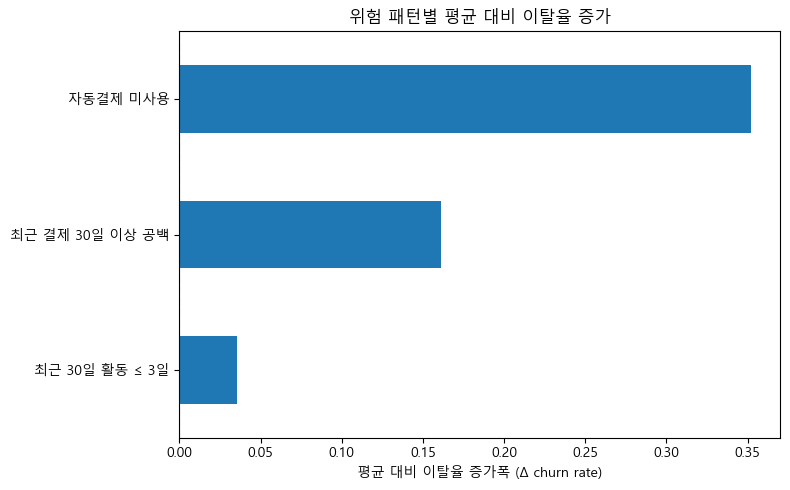

In [12]:
risk_groups = {
    '최근 30일 활동 ≤ 3일': df[df['num_days_active_w30'] <= 3],
    '최근 결제 30일 이상 공백': df[df['days_since_last_payment'] >= 30],
    '자동결제 미사용': df[df['is_auto_renew_last'] == 0]
}

lift_result = {}

for name, subset in risk_groups.items():
    lift_result[name] = subset[TARGET].mean() - avg_churn

lift_df = pd.Series(lift_result).sort_values()

plt.figure(figsize=(8, 5))
lift_df.plot(kind='barh')
plt.axvline(0, linestyle='--')
plt.xlabel('평균 대비 이탈율 증가폭 (Δ churn rate)')
plt.title('위험 패턴별 평균 대비 이탈율 증가')
plt.tight_layout()
plt.show()


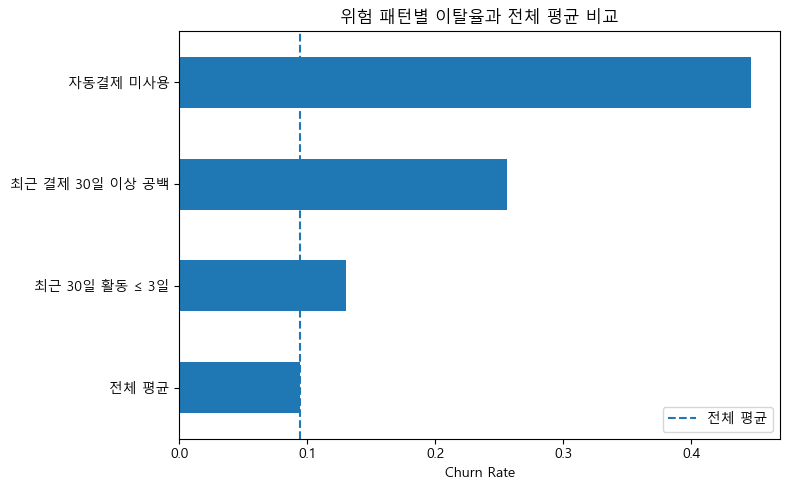

In [13]:
churn_rate_compare = {
    '전체 평균': avg_churn,
    '최근 30일 활동 ≤ 3일': df.loc[df['num_days_active_w30'] <= 3, TARGET].mean(),
    '최근 결제 30일 이상 공백': df.loc[df['days_since_last_payment'] >= 30, TARGET].mean(),
    '자동결제 미사용': df.loc[df['is_auto_renew_last'] == 0, TARGET].mean()
}

rate_df = pd.Series(churn_rate_compare).sort_values()

plt.figure(figsize=(8, 5))
rate_df.plot(kind='barh')
plt.axvline(avg_churn, linestyle='--', label='전체 평균')
plt.xlabel('Churn Rate')
plt.title('위험 패턴별 이탈율과 전체 평균 비교')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\OWNER\AppData\Local\Temp\ipykernel_20156\3654147633.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('usage_bucket_w30')[TARGET]


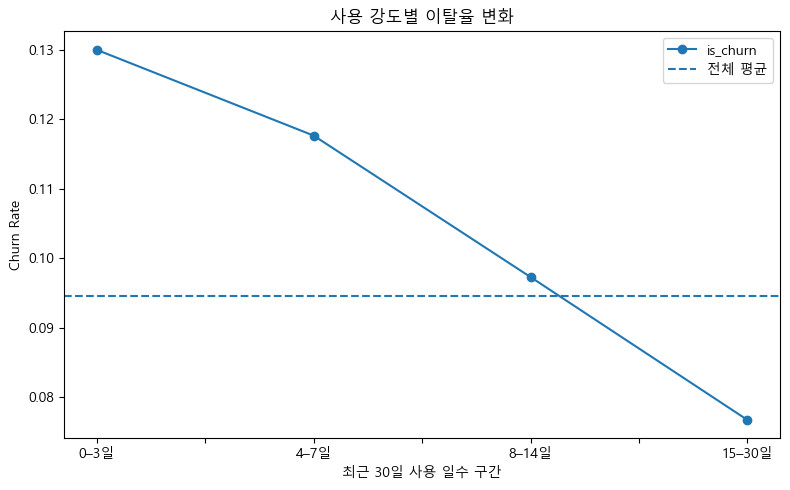

In [14]:
bins = [-1, 3, 7, 14, 30]
labels = ['0–3일', '4–7일', '8–14일', '15–30일']

df['usage_bucket_w30'] = pd.cut(
    df['num_days_active_w30'],
    bins=bins,
    labels=labels
)

bucket_churn = (
    df.groupby('usage_bucket_w30')[TARGET]
      .mean()
      .reindex(labels)
)

plt.figure(figsize=(8, 5))
bucket_churn.plot(marker='o')
plt.axhline(avg_churn, linestyle='--', label='전체 평균')
plt.xlabel('최근 30일 사용 일수 구간')
plt.ylabel('Churn Rate')
plt.title('사용 강도별 이탈율 변화')
plt.legend()
plt.tight_layout()
plt.show()
